#### Neural Network For Churn Prediction

##### Neural Network model built through Keras Tensorflow to predict client churn of a Bank client

#### **Action Plan**

- Data understanding
- Data Cleaning
- Exploratory Data Analysis
- Prepare Dataset for model building:
    - Take Care of categorical data
    - Data Scaling
    - Split data between features and label
- Model Building:
    - Split between training and test set
    - Build Model using Keras Sequential API
    - Compile Keras Model
    - Train Model
    - Measure Model Performance
- Predict Churn

#### **Data understanding**

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#create pandas dataframe from Bank data csv file

df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

##### **Some initial considerations**

- from a first look to the data, we can see we have 1000 rows of info and 14 columns. The label column that tells us if the customer churned or not is the Exited column (1=exited or churned, 0=stayed or not churned)
- the datatypes we need are in the right format, next steps will be deleting the columns we dont need for the model and checking if there are NaN rows

#### **Data Cleaning**

##### **Dropping Columns and NaN Values**

In [4]:
# Drop columns not needed

columns=['RowNumber','CustomerId','Surname','Geography']

df.drop(columns=columns, axis=1, inplace=True)

In [5]:
# Check NaN values
df.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1


- We dropped the columns not useful for the Neural Network mode and those are: RowNumber','CustomerId','Surname','Geography'
- We checked if there are NaN values, there are no NaN values

#### **Exploratory Data Analysis**

In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


##### **Explore Data Distribution**

We are going to explore the distribution of the numerical data of the following columns: Credit Score, Age, Tenure, Balance, NumOfProducts, Estimated Salary. We will use histogram plots.

##### **Credit Score**

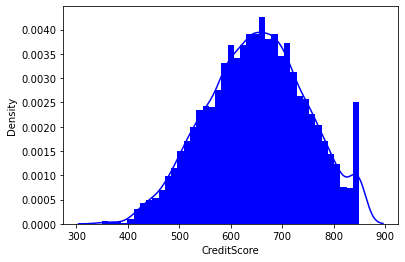

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.distplot(df.CreditScore, color="blue", kde=True, hist_kws={"alpha": 1}) 
plt.show()

The data distribution looks as a normal distribution or Gaussian distribution, very extreme values not present.

##### **Age**

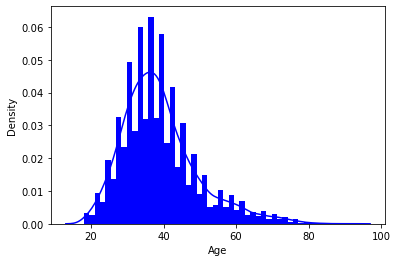

In [9]:
sns.distplot(df.Age, color="blue", kde=True, hist_kws={"alpha": 1}) 
plt.show()

The data distribution seems to have extreme levels and it is right skewed. The extreme levels are basically the minimum level of 18 (years) and 92(years). At the moment is not needed to take out the outliers as they look as common ages.

##### **Tenure, Balance, NumOfProducts, Estimated Salary**

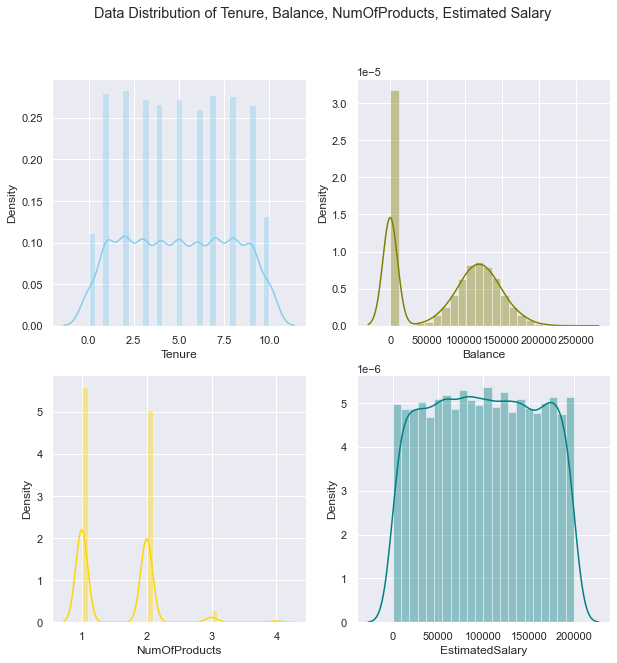

In [10]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Data Distribution of Tenure, Balance, NumOfProducts, Estimated Salary')
sns.distplot(df.Tenure, kde=True, color="skyblue", ax=axs[0, 0])
sns.distplot(df.Balance, kde=True, color="olive", ax=axs[0, 1])
sns.distplot(df.NumOfProducts, kde=True, color="gold", ax=axs[1, 0])
sns.distplot(df.EstimatedSalary, kde=True, color="teal", ax=axs[1, 1])
plt.show()

The data looks ok, only Tenure with 0 value could seem a bit outlierish, but because is in years it means that probably there are clients that have tenure less then a year.

##### **Data Relationship Analysis**

<AxesSubplot:>

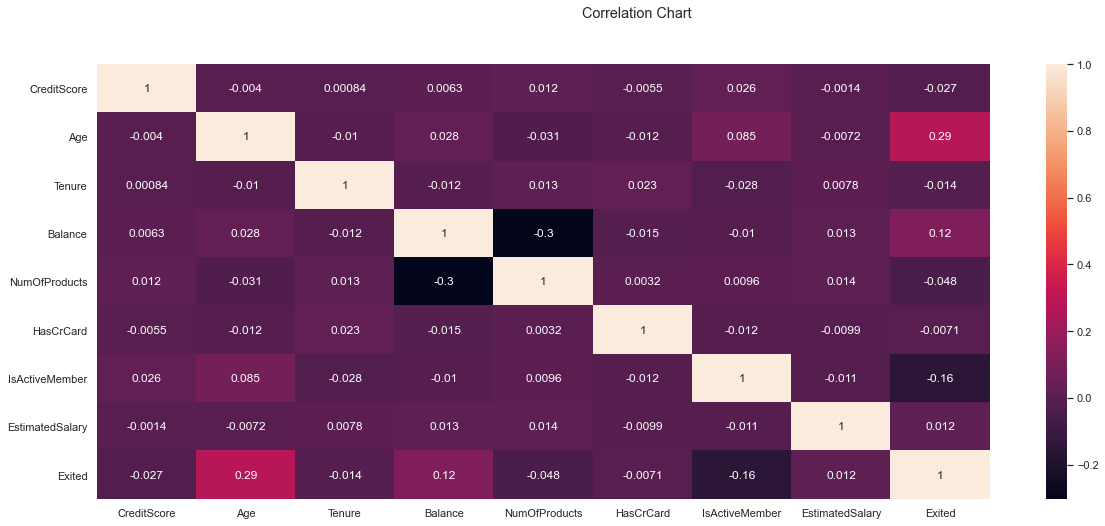

In [11]:
#correlation chart

fig, ax = plt.subplots(figsize=(20, 8))
fig.suptitle('Correlation Chart')
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
               annot=True)


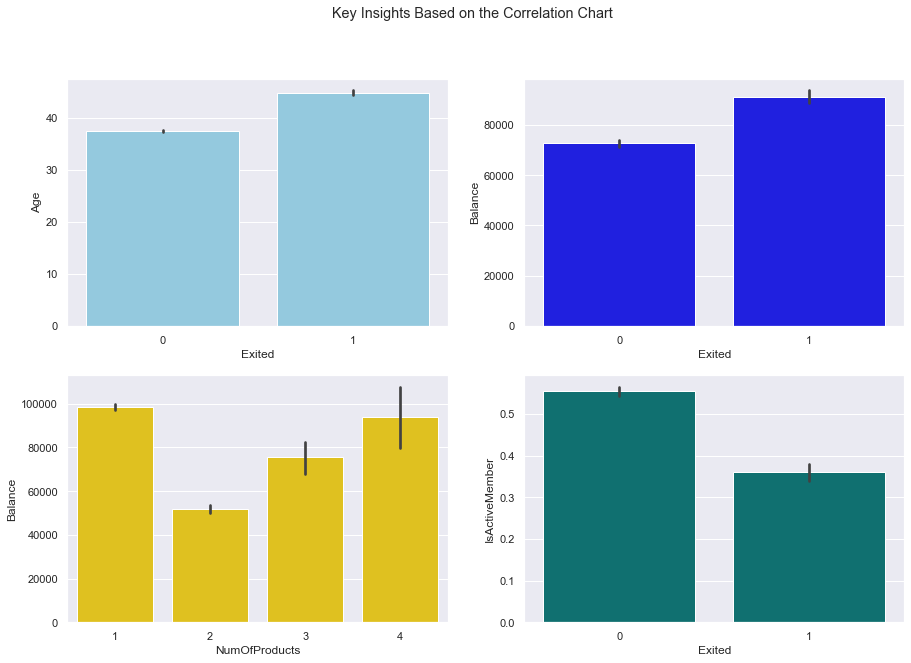

In [12]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Key Insights Based on the Correlation Chart')
sns.barplot(x='Exited', y='Age', data=df, color="skyblue", ax=axs[0, 0])
sns.barplot(x='Exited', y='Balance', data=df, color="blue", ax=axs[0, 1])
sns.barplot(x='NumOfProducts', y='Balance', data=df, color="gold", ax=axs[1, 0])
sns.barplot(x='Exited', y='IsActiveMember', data=df, color="teal", ax=axs[1, 1])
plt.show()

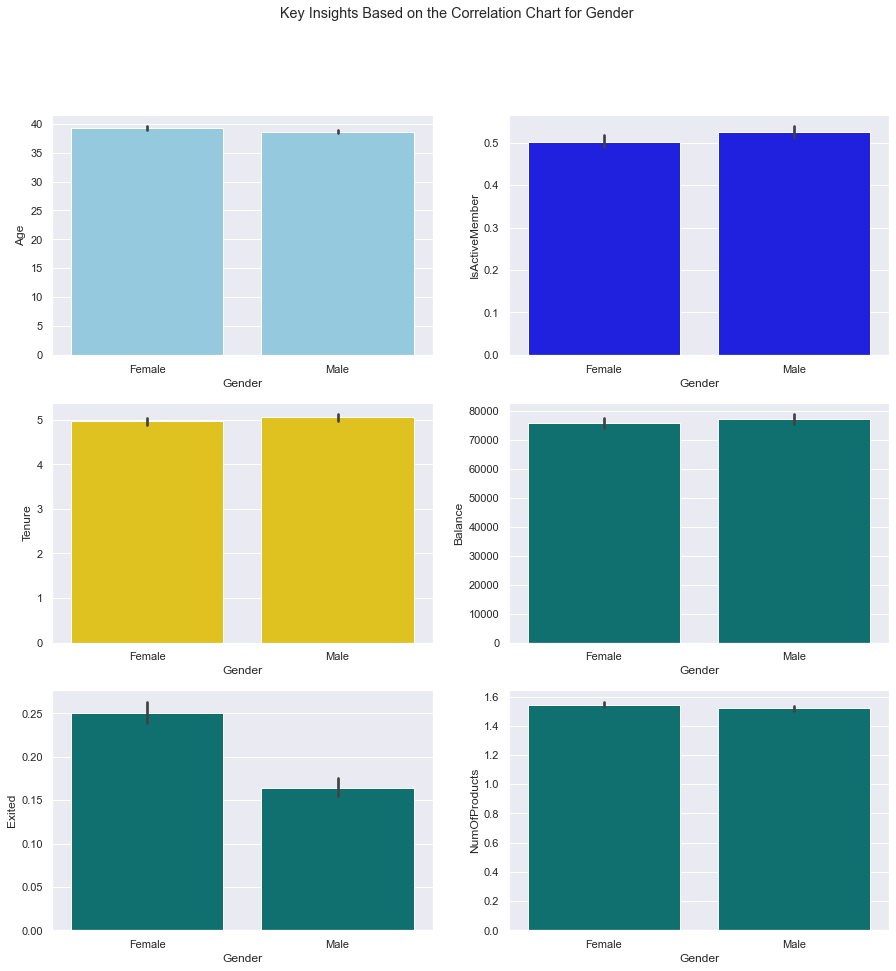

In [13]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Key Insights Based on the Correlation Chart for Gender')
sns.barplot(x='Gender', y='Age', data=df, color="skyblue", ax=axs[0, 0])
sns.barplot(x='Gender', y='IsActiveMember', data=df, color="blue", ax=axs[0, 1])
sns.barplot(x='Gender', y='Tenure', data=df, color="gold", ax=axs[1, 0])
sns.barplot(x='Gender', y='Balance', data=df, color="teal", ax=axs[1, 1])
sns.barplot(x='Gender', y='Exited', data=df, color="teal", ax=axs[2, 0])
sns.barplot(x='Gender', y='NumOfProducts', data=df, color="teal", ax=axs[2, 1])
plt.show()

##### **Key Observations**

- Older clients are more prone to exit(churn)
- Clients with higher balance tends to exit(churn) more vs lower balance
- Usually who has 1 or 4 products has higher balance
- No big difference in age between gender
- Male are slightly more active members than female
- No meaningful differerence in terms of tenure between genders
- Balance slightly higher for Male, but no meaningful difference
- Female tends to exit(churn) more than male
- Female have slightly more products than Male, but no big difference

#### **Prepare Dataset for model building**

##### **Take Care of categorical data**

In [60]:
df



,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1


##### Transforming Gender in 0 and 1 values

In [61]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

##### **Data Scaling**

For deep learning models is quite important to scale the data where the range is quite wide, such as in **CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary**. We are going to use sklearn MinMax Scaler function.

In [67]:
# Use of sklearn library for Min Max scaling

from sklearn.preprocessing import MinMaxScaler

col_to_scale= ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = MinMaxScaler()
df[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

In [68]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0
9996,0.332,0,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0
9997,0.718,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1
9998,0.844,0,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1


##### **Split data between features(X) and label(Y)**: Features includes all the columns except Exited, that is the label column

In [74]:
X = df.drop(columns='Exited', axis=1, inplace=True)

KeyError: "['Exited'] not found in axis"

In [80]:
df2

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,None,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,None,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,None,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,None,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
4,1.000,None,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...
9995,0.842,None,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0
9996,0.332,None,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0
9997,0.718,None,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1
9998,0.844,None,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1


In [77]:
# X is the features section of the model
X = df

In [84]:
# y is the label that is the response/result of the churn (yes/no)

print(X.shape, y.shape)

(10000, 9) (10000,)


In [83]:
y.dtypes

dtype('int64')

##### **Train Test Split**

In [85]:
# We use train test split function of sklearn

from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y, test_size=0.2)


In [86]:
#check the shape of train and test data. I had to put train2/test2 because I had to reinstall Tensorflow/Keras

print(X_train2.shape, X_test2.shape)

print(y_train2.shape, y_test2.shape)


(8000, 9) (2000, 9)
(8000,) (2000,)


##### **Build Model using Keras Sequential API**

The type of deep learning model for this dataset is a classification model

In [91]:
# Looking the number of columns as they will be used as inputs for the neural network

len(X_train2.columns)

9

In [92]:
#Import main neural network libraries: tensorflow and keras

import tensorflow
import tensorflow.keras
from tensorflow import keras

##### **Compile and Train Keras Model**

In [93]:
# 1 Creation of the neural network

model = keras.Sequential([
    keras.layers.Dense(30, input_shape=(9,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),    
])

# 2 Compiling the model

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 3 Run the model using training data

model.fit(X_train2, y_train2, epochs=5)

Epoch 1/5
250/250 [==============================] - 1s 1ms/step - loss: 0.5203 - accuracy: 0.7625
Epoch 2/5
250/250 [==============================] - 0s 1ms/step - loss: 0.4619 - accuracy: 0.8009
Epoch 3/5
250/250 [==============================] - 0s 1ms/step - loss: 0.4439 - accuracy: 0.8110
Epoch 4/5
250/250 [==============================] - 0s 1ms/step - loss: 0.4321 - accuracy: 0.8149
Epoch 5/5
250/250 [==============================] - 0s 1ms/step - loss: 0.4230 - accuracy: 0.8209


In [94]:
# 4 Increasing the epochs(200) as the model looks good based on the increase of the accuracy

model.fit(X_train2, y_train2, epochs=200)

Epoch 1/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8257
Epoch 2/200
250/250 [==============================] - 0s 2ms/step - loss: 0.4001 - accuracy: 0.8316
Epoch 3/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3887 - accuracy: 0.8364
Epoch 4/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3797 - accuracy: 0.8428
Epoch 5/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3726 - accuracy: 0.8455
Epoch 6/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3681 - accuracy: 0.8486
Epoch 7/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3648 - accuracy: 0.8496
Epoch 8/200
250/250 [==============================] - 0s 2ms/step - loss: 0.3605 - accuracy: 0.8526
Epoch 9/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3591 - accuracy: 0.8544
Epoch 10/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3577 - accura

##### **Measure Model Performance**

In [95]:
# Evaluate the model

model.evaluate(X_test2, y_test2)

63/63 [==============================] - 0s 1ms/step - loss: 0.3801 - accuracy: 0.8505


[0.38010480999946594, 0.8504999876022339]

##### **Model Description**

- Model built with 45 neurons, the outputlayer activation is a sigmoid because it is a classification model
- Model compiled using binary crossentropy and metric accuracy as it is a classification model
- Model trained with 200 epochs (GPU used: Nvidia RTX 2060)
- Model Accuracy Evaluation: 87%

##### **Predict Churn**

In [96]:
yp = model.predict(X_test2)
yp[:5]

array([[0.00325818],
       [0.05473597],
       [0.0043854 ],
       [0.0596288 ],
       [0.13546348]], dtype=float32)

In [97]:
y_test2[:5]

6306    0
5128    0
7538    0
8217    0
952     0
Name: Exited, dtype: int64

In [98]:
# we convert the shape of yp to make sure is one dimension, so it is easy to compare the prediction with the y_test

y_pred= []
for el in yp:
    if el > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0) 

In [105]:
y_pred[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [106]:
y_test2[:20]

6306    0
5128    0
7538    0
8217    0
952     0
3102    0
7078    0
2467    0
7601    0
4089    0
4955    0
2137    0
1045    0
4823    0
4374    0
6449    1
9223    0
1999    0
1265    1
2925    0
Name: Exited, dtype: int64

##### Prediction Considerations:

Comparing test data(y_test) vs predicted data(y_pred), we clearly see the **85% accuracy** as within first 20 results **the model predicted 19 times correctly and 1 times wrongly**

##### **Model Evaluation through confusion matrix**

Text(66.5, 0.5, 'Truth')

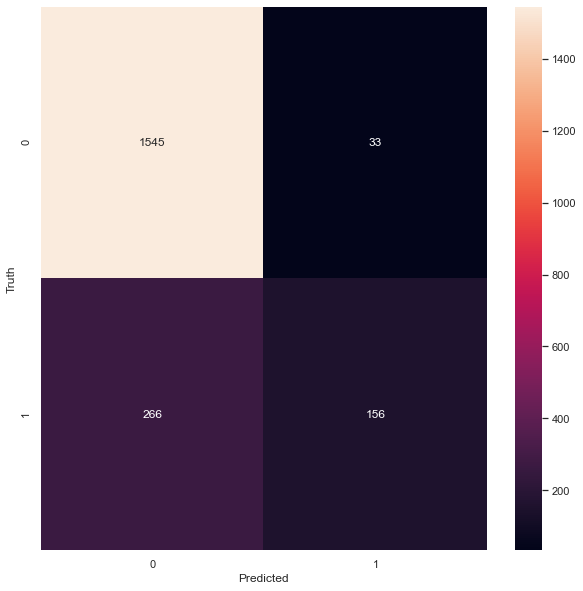

In [101]:
# Confusion matrix from tensorflow

cm = tensorflow.math.confusion_matrix(labels=y_test2, predictions=y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

##### **Confusion Matrix Results Description**

From the confusion matrix we need to see the diagonal from left to right bottom to see how many times our model predicted corrected therefore:

- 1545+156 = 1702 times our model predicted corrected
- 266+33 = 299 times our model predicted wrongly

We can definitely conclude that the neural network model reached a strong level of efficiency

In [103]:
X_test2

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6306,0.846,0,0.202703,0.9,0.000000,0.333333,1,1,0.005534
5128,0.316,1,0.270270,0.3,0.662933,0.333333,0,1,0.113024
7538,0.502,0,0.135135,0.6,0.000000,0.333333,1,0,0.073275
8217,0.510,0,0.770270,0.2,0.244401,0.000000,0,1,0.933307
952,0.442,1,0.648649,0.9,0.444710,0.000000,0,1,0.946392
...,...,...,...,...,...,...,...,...,...
3473,0.664,1,0.324324,0.0,0.000000,0.000000,0,1,0.459895
1879,0.458,0,0.175676,0.9,0.000000,0.000000,0,1,0.695248
2318,0.644,0,0.202703,0.2,0.000000,0.333333,1,1,0.913719
4817,0.580,0,0.135135,0.7,0.000000,0.333333,1,1,0.655494
